In [191]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

In [192]:
img = cv2.imread("../../../image/template/template_pic1_x_573_y_276_w_115_h_312.jpg")

# ตัดส่วนบนออกไป 50 พิกเซล
# img = img[220:, :]   # [rows, cols] → ตัด row ด้านบน

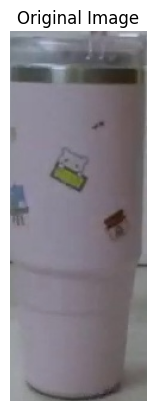

In [193]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

In [194]:
# blur = cv2.GaussianBlur(img, (5, 5), 0)

In [195]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [196]:
# ช่วงค่าต่ำสุด ของสีชมพู
lower_pink = np.array([120, 20, 80])

# ช่วงค่าสูงสุด ของสีชมพู
upper_pink = np.array([170, 100, 200])


In [197]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [198]:
mask = cv2.inRange(hsv, lower_pink, upper_pink)

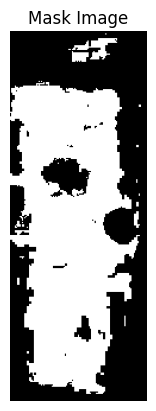

In [199]:
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

plt.imshow(mask_rgb)
plt.title("Mask Image")
plt.axis('off')
plt.show()

In [200]:
mask = cv2.medianBlur(mask, 5)

kernel = np.ones((7, 7), np.uint8)

# ปิดช่องว่างเล็กๆ
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

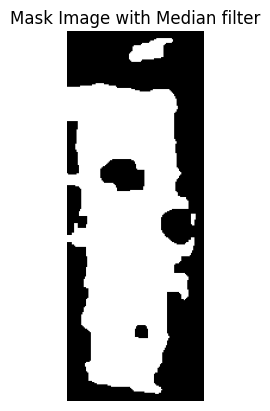

In [201]:
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

plt.imshow(mask_rgb)
plt.title("Mask Image with Median filter")
plt.axis('off')
plt.show()

In [202]:
contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [203]:
# กำหนดตัวแปรสำหรับเก็บค่าพื้นที่มากที่สุดและ contour ที่ใหญ่ที่สุด
max_area = 0
largest_contour = None

# วนลูปผ่านทุก contour
for contour in contours:
    # คำนวณพื้นที่ของ contour ปัจจุบัน
    area = cv2.contourArea(contour)
    
    # ถ้าพื้นที่ปัจจุบันมากกว่าพื้นที่ที่เคยหาได้
    if area > max_area:
        # อัปเดตค่าพื้นที่และ contour
        max_area = area
        largest_contour = contour

print(f"Detected ball area: {max_area} pixels")

Detected ball area: 19261.0 pixels


In [204]:
x, y, w, h = cv2.boundingRect(largest_contour)

In [205]:
bbox_area = w * h

In [206]:
img_box = img.copy()
# พารามิเตอร์: ภาพ, จุดมุมบนซ้าย, จุดมุมล่างขวา, สี (BGR), ความหนาเส้น
cv2.rectangle(img_box, (x, y), (x + w, y + h), (255, 0, 0), 2)

array([[[166, 158, 151],
        [164, 156, 149],
        [163, 155, 148],
        ...,
        [162, 155, 152],
        [162, 155, 152],
        [162, 155, 152]],

       [[163, 155, 148],
        [163, 155, 148],
        [162, 154, 147],
        ...,
        [162, 155, 152],
        [161, 154, 151],
        [162, 155, 152]],

       [[166, 159, 150],
        [166, 159, 150],
        [166, 159, 150],
        ...,
        [159, 152, 149],
        [156, 149, 146],
        [159, 152, 149]],

       ...,

       [[161, 158, 154],
        [161, 158, 154],
        [161, 158, 154],
        ...,
        [126, 131, 130],
        [126, 131, 130],
        [126, 131, 130]],

       [[161, 158, 154],
        [161, 158, 154],
        [161, 158, 154],
        ...,
        [125, 130, 128],
        [125, 130, 128],
        [125, 130, 128]],

       [[161, 158, 154],
        [161, 158, 154],
        [161, 158, 154],
        ...,
        [125, 130, 128],
        [125, 130, 128],
        [125, 130, 128]]

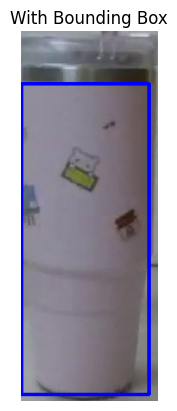

In [207]:
img_box_plot = cv2.cvtColor(img_box, cv2.COLOR_BGR2RGB)

plt.imshow(img_box_plot)
plt.title("With Bounding Box")
plt.axis('off')
plt.show()

In [208]:
print(f'x={x}, y={y}, w={w}, h={h}')

x=0, y=44, w=107, h=262
